<a href="https://colab.research.google.com/github/jpsanchezr/DSII_61740/blob/main/ProyectoDS2_Final_Sanchez_Romero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tasa de Rotación de Clientes (Bancarios): Un Modelo de Machine Learning (ML) de Clasificación**


Identificación del Proyecto
* Curso: Data Science II: Machine Learning para la Ciencia de Datos
* Comisión: 61740
* Presentado por: Jean Paul Sanchez Romero

Índice

1. Entendimiento del problema
2. Definición del entorno
3. Análisis Exploratorio de Datos (EDA)
4. Prueba de modelos de Machine Learning (ML) supervisados
5. Análisis de los resultados de los modelos
6. Optimización de Modelos
7. Conclusiones

# **1. Etendimiento del problema**

## **1.1. Resumen y motivación**

La tasa de rotación de clientes (o *churn* en inglés) representa la proporción de clientes que dejan de utilizar un producto o un servicio y se van a la competencia. Esta tasa se mide como un porcentaje comparando el número de clientes que se fueron a la competencia contra el número total de clientes.

El análisis de esta tasa es importante, entre muchas otras razones, porque:
* cada cliente que se va representa una potencial pérdida de ingresos;
* adquirir nuevos clientes suele ser más costoso que retener a los existentes;
* un alto índice puede significar problemas con la calidad del servicio o del producto.

El nivel de competencia en el mercado, la satisfacción y los cambios de necesidades de los clientes son algunos de los factores que pueden influir en esta tasa.

El objetivo principal de este proyecto es el de aplicar un modelo de Machine Learning (ML) de clasificación para determinar si un cliente dejará el banco o no, específicamente de clientes bancarios, y así, en un futuro , poder predecir la tasa de rotación. Para esto se utilizará un dataset de 10,000 clientes (registros) en el que se detalla el nivel crediticio, la edad, la antigüedad, la cantidad de productos, y otros factores que serán importantes para el análisis y la proyección.

Algunas de las preguntas que surgen son: ¿Cuál es la tasa de rotación de clientes del dataset actualmente? ¿De qué país son los clientes cuya tasa de rotación es más alta? ¿Cuánta es la antigüedad promedio de los clientes que decidieron irse con la competencia? ¿Cuál es el balance y los ingresos promedio de los clientes que dejaron el banco? ¿Cuál es el balance total y promedio de los clientes que permanecen en el banco?

## **1.2. Objetivos**

Principales:
* Desarrollar un modelo de ML de Clasificación

Secundarios:
* Analizar el dataset en busca de valores nulos, atípicos o faltantes;
* Limpiar el dataset de cualquier anomalía;
* Realizar un análisis estadístico de las variables del dataset;
* Probar diferentes modelos de ML de clasificación;
* Evaluar los resultados de los modelos y seleccionar el que mejor se ajuste a las necesidades;

## **1.3. Presentación ejecutiva**

Un resumen de los principales temas presentados en este workbook se encuentra en el enlace a continuación

[DSII - Presentación Ejecutiva](https://docs.google.com/presentation/d/1K0KkpgydOlwypVCLTTrd6Cc3THSJvFOy/edit?usp=sharing&ouid=111583321237313744359&rtpof=true&sd=true)

# **2. Definición del entorno**

Esta sección sirve para definir las librerías, módulos y ambientes, entre otros, que se utilizarán a lo largo de este proyecto.

La lista que se incluye a continuación no es exhaustiva ya que, en algunos casos, las librerías más específicas se importaran al momento de ser necesarias.

## **2.1. Carga de librerías y módulos**

In [125]:
# Instalando las librerías a utilizar
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install -U scikit-learn

In [126]:
# Importando liberías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando módulos
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn import metrics

# Importando los modelos
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Importando métricas
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, classification_report

## **2.2. Configurando Google Colab**

In [127]:
# Configuramos el entorno de Python en Google Colab
from google.colab import drive
import os

drive.mount("/content/drive")
print(os.getcwd())

os.chdir("/content/drive/My Drive/")
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive


# **3. Análisis Exploratorio de Datos (EDA)**

El análisis exploratorio de datos o EDA (por sus siglas en inglés, Exploratory Data Analysis), es la etapa que ayudará a comprender los datos, a detectar valores atípicos o anomalías (evaluar la calidad de los datos), a formular hipótiesis y, en sintesis, guiar en el preprocesamiento de la información.

En esta sección del trabajo se aplicarán las etapas del EDA descritas por Mauricio Rivadeneira Jaederlund en su artículo de LinkedIn "Exploratory Data Analysis (EDA): Entendiendo y tratando los datos antes que nada" (link: https://www.linkedin.com/pulse/exploratory-data-analysis-eda-entendiendo-y-tratando-mauricio-pda1f/), estas son:

1. Recopilación de datos,
2. Exploración inicial,
3. Limpieza de datos,
4. Tratamiento de datos faltantes,
5. Identificación y tratamiento de outliers,
6. Manejo de datos dependientes, y
7. Análisis estadístico y visualización

## **3.1. Recopilación de datos**

Como se mencionó anteriormente, el dataset a utilizar contiene la información de diez mil clientes de un banco desconocido.

En esta sección se incluye:
* la importación del dataset creando variables para la ruta y el dataset;
* la identificación de las variables del dataset

### **Importación del dataset**

In [128]:
# Creando una variable para contener la ruta dataset
path = "https://raw.githubusercontent.com/jpsanchezr/DSII_61740/refs/heads/main/Bank-Customer-Churn-Prediction.csv"

In [129]:
# Creando la variable del dataset
rotacion = pd.read_csv(path)
rotacion.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [130]:
rotacion.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [131]:
rotacion.sample(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
5886,15812920,607,Germany,Male,40,5,90594.55,1,0,1,181598.25,0
145,15800703,485,Spain,Female,21,5,113157.22,1,1,1,54141.50,0
1737,15683677,769,Spain,Male,39,9,0.00,1,1,1,47722.79,0
2594,15787318,537,Germany,Female,47,6,103163.35,1,1,0,16259.64,1
89,15767954,635,Germany,Female,28,3,81623.67,2,1,1,156791.36,0


### **Identificación de las variables**

In [132]:
# Obtener la lista de variables
variables = rotacion.columns.tolist()
variables

['customer_id',
 'credit_score',
 'country',
 'gender',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'churn']

Como se observa en la sentencia anterior, las variables de este dataset son las siguientes:

* **customer_id**: identificador único de cliente [Cualitativa ordinal];
* **credit_score**: puntaje crediticio - Un mayor valor es mejor [Cuantitativa discreta];
* **country**: país de residencia del cliente [Cualitativa nominal];
* **gender**: género del cliente (Female = Femenino; Male = Masculino) [Cualitativa nominal];
* **age**: edad del cliente [Cuantitativa discreta];
* **tenure**: antigüedad del cliente [Cuantitativa discreta];
* **balance**: estado o balance de la cuenta [Cuantitativa continua];
* **products_number**: cantidad de productos con el banco [Cuantitativa discreta];
* **credit_card**: representa si tiene (1) o no tiene (0) una tarjeta de crédito con el banco [Cualitativa ordinal lógica];
* **active_member**: representa si es un cliente activo (1) o no (0) [Cualitativa ordinal lógica];
* **estimated_salary**: salario estimado del cliente [Cuantitativa continua];
* **churn**: representa si se cambió de banco (1) o no (0) [Cualitativa ordinal lógica].


Dado que el *customer_id* es un identificador único, podría usarse como índice del dataset después de validar que no existen registros duplicados, o eliminarse directamente.

Nuestra variable target para este estudio es *churn*.

## **3.2. Exploración inicial**

Esta fase permitirá verificar la calidad y validez de los datos antes de aplicar técnicas de análisis más avanzadas.

En esta sección se incluye:
* la identificación inicial de los tipos de datos del dataset;
* la modificación, de ser necesaria, de las variables del dataset; y
* la revisión de la calidad de los datos



### **Información del dataset**

In [133]:
rotacion.shape

(10000, 12)

In [134]:
rotacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


De las sentencias anteriores se observa que el dataset elegido contiene 12 variables. Los tipos de datos son: enteros (*int64*), decimales (*float64*) y de objeto (*object*); aunque en realidad las variables *credit card*, *active_member* y *churn* deben tratarse como booleanos (True = 1, False = 0).

Las variables cualitativas o categorícas  del dataset que no se representan con números (*country* y *gender*) se reemplazaran por números usando la técnica del LabelEncoder.

Es importante mencionar que la variable *customer_id*, también categórica, al ser un identificador único de cliente puede usarse para el conteo y para establecer un índice, puesto que no representa información útil para el modelo de ML.

También se observa que de las diez mil entradas, ninguna corresponde a un dato nulo. Este tratamiento se ampliará en la sección 4.4 Tratamiento de datos faltantes.

### **Modificación de variables**

Como se mencionó en el apartado anterior sobre el dataset, tres de las variables deben tratarse como booleanos, es decir, que tomen el valor de falso (False = 0) o verdadero (True = 1). En esta sección aplicaremos este tipo de datos a las variables: *credit_card*, *active_member* y *churn*.

In [135]:
rotacion ["credit_card"] = rotacion ["credit_card"].astype(bool)
rotacion ["active_member"] = rotacion ["active_member"].astype(bool)
rotacion ["churn"] = rotacion ["churn"].astype(bool)

#### Disclaimer

La sección a continuación se incluye en este apartado, previo al uso del LabelEncoder con la finalidad de aplicar el método del Chi2 y así calcular la correlación entre las variables categóricas y numéricas.

Este análisis hace parte de la sección "3.6 Manejo de datos dependientes" y su interpretación se incluirá en esa sección.

In [136]:
# Función para calcular la correlación entre variables categóricas:
def cramers_v(x, y):
  confusion_matrix = pd.crosstab(x, y)
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

In [137]:
# Función para calcular la correlación entre variables numéricas y categóricas:
def numerical_categorical_corr(df):
    correlations = {}
    for num_col in df.select_dtypes(include=["number"]).columns:
        for cat_col in df.select_dtypes(include=["object", "category", "bool"]).columns:
            correlation = cramers_v(df[cat_col], df[num_col])
            correlations[f'{num_col} - {cat_col}'] = correlation
    return pd.Series(correlations)

# Calcular correlación numérica-categórica
num_cat_corr = numerical_categorical_corr(rotacion)
print(num_cat_corr)

customer_id - country               1.000000
customer_id - gender                1.000000
customer_id - credit_card           1.000000
customer_id - active_member         1.000000
customer_id - churn                 1.000000
credit_score - country              0.220984
credit_score - gender               0.216258
credit_score - credit_card          0.202276
credit_score - active_member        0.211031
credit_score - churn                0.225880
age - country                       0.097273
age - gender                        0.099302
age - credit_card                   0.082292
age - active_member                 0.166181
age - churn                         0.400934
tenure - country                    0.041356
tenure - gender                     0.040643
tenure - credit_card                0.040856
tenure - active_member              0.037457
tenure - churn                      0.037283
balance - country                   0.870788
balance - gender                    0.798570
balance - 

#### Final del disclaimer

Aplicando la técnica de LabelEncoder se modificaran las variables de *country* y *gender*

In [138]:
# Instanciando el LabelEncoder
le = LabelEncoder()

In [139]:
# aplicando la modifación a country
le_country = le.fit_transform(rotacion["country"])
rotacion["country"] = le_country

In [140]:
# Imprimiendo el mapeo del encoder
country_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(country_mapping)

{'France': np.int64(0), 'Germany': np.int64(1), 'Spain': np.int64(2)}


Los países quedan mapeados de la siguiente manera:

| País | Mapeo |
| ---  | --- |
| France | 0 |
| Germany | 1 |
| Spain | 2 |

In [141]:
# aplicando la modifación a gender
le_gender = le.fit_transform(rotacion["gender"])
rotacion["gender"] = le_gender

In [142]:
# Imprimiendo el mapeo del encoder
gender_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(gender_mapping)

{'Female': np.int64(0), 'Male': np.int64(1)}


Los géneros quedan mapeados de la siguiente manera:

| Género | Mapeo |
| --- | --- |
| Female | 0 |
| Male | 1 |

### **Revisión de calidad**

In [143]:
# Sentencia para validar que los datos se guardaron con un tipo nuevo
rotacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  int64  
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  bool   
 9   active_member     10000 non-null  bool   
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


In [144]:
rotacion.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,True,True,101348.88,True
1,15647311,608,2,0,41,1,83807.86,1,False,True,112542.58,False
2,15619304,502,0,0,42,8,159660.80,3,True,False,113931.57,True
3,15701354,699,0,0,39,1,0.00,2,False,False,93826.63,False
4,15737888,850,2,0,43,2,125510.82,1,True,True,79084.10,False


Los datos se han guardado con los tipos correctos. Se pasa ahora a revisar algunas medidas estadísticas.

In [145]:
rotacion.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
credit_score,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
country,10000.0,NaN,NaN,NaN,0.7463,0.827529,0.0,0.0,0.0,1.0,2.0
gender,10000.0,NaN,NaN,NaN,0.5457,0.497932,0.0,0.0,1.0,1.0,1.0
age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
products_number,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
credit_card,10000,2,True,7055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_member,10000,2,True,5151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De la tabla anterior se evidencia que la cantidad de clientes que se fueron a la competencia es de 2,037 (dos mil treinta y siete) (20.37%), siendo la diferencia entre el total de clientes (10,000) y la frecuencia de falsos para la variable *churn* (7,963).

No se evidencian problemas de calidad con los datos. Todas las variables presentan medidas estadísticas consideradas "normales".

## **3.3. Limpieza de datos**

Esta fase permitirá identificar los datos faltantes, duplicados y abordar problemas de calidad de datos.

En esta sección se incluye:
* la identificación de duplicados,
* la identificación de datos nulos, y
* la reivisión de los ceros.

### **Identificación de duplicados**

Dado que la variable customer_id es un identificador único, es necesario validar que el dataset no incluya registros duplicados.

In [146]:
# Verificando la cantidad de líneas duplicadas
rotacion.duplicated().sum()

np.int64(0)

Después de esta validación, se puede afirmar que todos los registros son únicos y se puede trabajar con el total del dataset.

### **Identificación de datos nulos**

Desde el apartado "Información del dataset" se había anticipado que no existen datos nulos. Esta sección corroborará esa apreciación incial.

In [147]:
# Verificando existencia y cantidad de datos nulos en el dataset
rotacion.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


Por la sentencia anterior podemos confirmar que el dataset no tiene datos nulos (nulls). No se requiere manipulación adicional y podemos continuar con el uso del dataset.

### **Revisión de los ceros**

En algunos casos, el cero puede ser un valor correcto pero en otros puede significar ausencia de datos o errores. Por eso es necesario revisar los ceros en nuestro data set.

In [148]:
# Verificando la existencia de ceros en el dataset
zero = rotacion == 0
zero.sum()

,0
customer_id,0
credit_score,0
country,5014
gender,4543
age,0
tenure,413
balance,3617
products_number,0
credit_card,2945
active_member,4849


Para este dataset, la presencia de ceros eera esperada en variables categóricas y buleanas como: country, gender, credit_card, active_member y churn. También se pueden presentar ceros en variables como tenure y balance.

La ausencia de ceros en variables como credit_score, age, products_number y estimated_salary indica que no hay datos faltantes en este dataset.

Se pudo confirmar que la variable *customer_id* no tiene valores duplicados y tampoco tiene valores nulos, por lo que podemos usarla como índice de nuestro dataset.

In [149]:
# Seteando la variable customer_id como índice de mi dataset
rotacion = rotacion.set_index("customer_id",)
rotacion.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,0,0,42,2,0.00,1,True,True,101348.88,True
15647311,608,2,0,41,1,83807.86,1,False,True,112542.58,False
15619304,502,0,0,42,8,159660.80,3,True,False,113931.57,True
15701354,699,0,0,39,1,0.00,2,False,False,93826.63,False
15737888,850,2,0,43,2,125510.82,1,True,True,79084.10,False


## **3.4. Tratamiento de datos faltantes**

Como parte del proceso de limpieza de datos, no se identificaron datos faltantes o nulos que requieran tratamiento en esta fase del proceso. Podemos continuar.

## **3.5. Identificación y tratamiento de outliers**

Los outliers son valores que por su naturaleza se consideran atípicos. Este tipo de valores pueden distorsionar la intepretación de los datos y por consiguiente es necesario aplicar técnicas para su identificación y tratamiento.

En cuanto al tratamiento, estos valores atípicos se pueden eliminar, transformar, reemplazar o tratarse como un grupo separado de datos.

En esta sección se incluye:
* la creación de una comprensión de lista,
* el chequeo de outliers mediante visualizaciones,
* la aplicación de la técnica del rango intercuartílico (IQR) para el tratamiento de outliers

### **Creación de una lista**

Para este análisis vamos a considerar sólo las variables cuantitativas. Todas las variables categorícas deben excluirse, esto incluye: Country, Gender, Credit Card, Active Member y Churn.

In [150]:
# Creando una variable para contener las columnas a excluir
sin_considerar = ["country","gender","credit_card","active_member","churn"]

In [151]:
# Creando una variable para contener las columnas a conservar
a_considerar = rotacion.columns.tolist()
considerar = [col for col in a_considerar if col not in sin_considerar]
considerar

['credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'estimated_salary']

In [152]:
# Variable con el datasetque incluye sólo las columnas a considerar
considerar = rotacion[considerar]
considerar.head()

,credit_score,age,tenure,balance,products_number,estimated_salary
customer_id,,,,,,
15634602,619,42,2,0.00,1,101348.88
15647311,608,41,1,83807.86,1,112542.58
15619304,502,42,8,159660.80,3,113931.57
15701354,699,39,1,0.00,2,93826.63
15737888,850,43,2,125510.82,1,79084.10


### **Chequeo de outliers**


Variable: credit_score
Media: 650.5288
Mediana: 652.0
Moda: 850


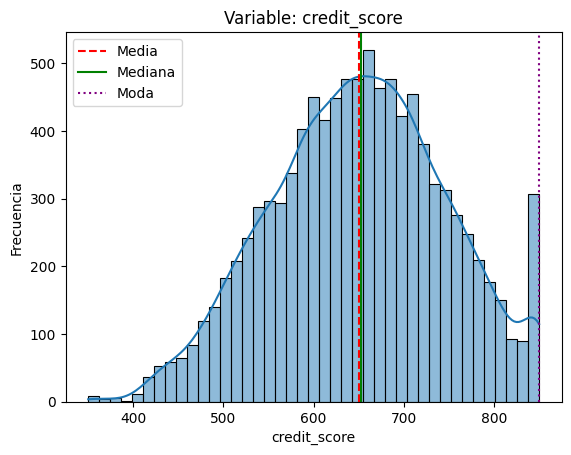


Variable: age
Media: 38.9218
Mediana: 37.0
Moda: 37


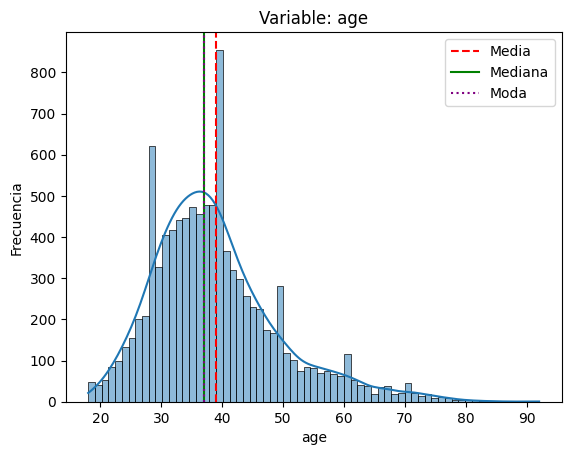


Variable: tenure
Media: 5.0128
Mediana: 5.0
Moda: 2


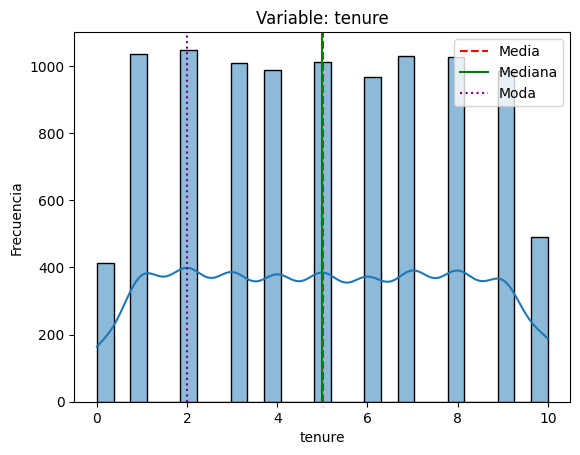


Variable: balance
Media: 76485.889288
Mediana: 97198.54000000001
Moda: 0.0


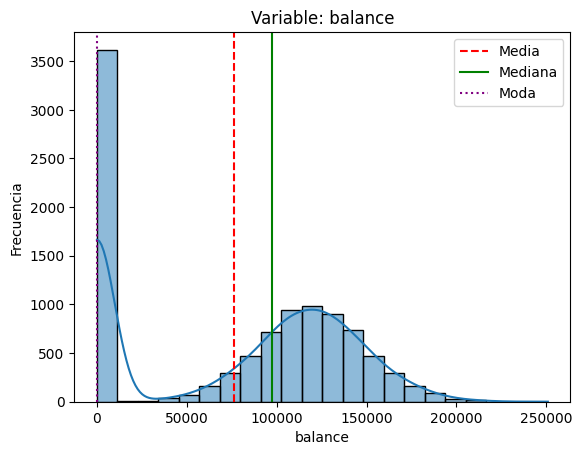


Variable: products_number
Media: 1.5302
Mediana: 1.0
Moda: 1


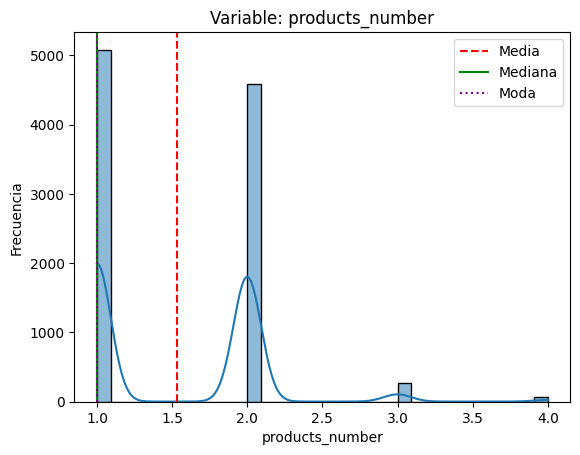


Variable: estimated_salary
Media: 100090.239881
Mediana: 100193.915
Moda: 24924.92


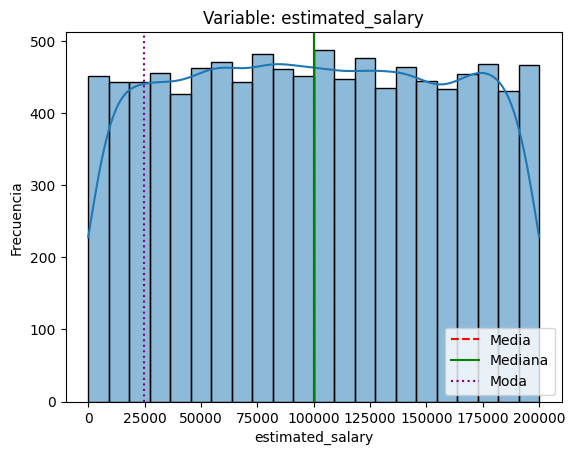

In [153]:
#Chequeo usando histogramas
for col in considerar.columns.to_list():

  # Cálculo de la media, mediana y moda
  media = considerar[col].mean()
  mediana = considerar[col].median()
  moda = considerar[col].mode()[0]

  print("\nVariable:", col)
  print("Media:", media)
  print("Mediana:", mediana)
  print("Moda:", moda)

  # Gráficos de manera individual
  fig = plt.figure()
  sns.histplot(considerar, x = col, kde=True)
  plt.axvline(media, color='red', linestyle='--', label='Media')
  plt.axvline(mediana, color='green', linestyle='-', label='Mediana')
  plt.axvline(moda, color='purple', linestyle=':', label='Moda')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.legend()
  plt.title(f"Variable: {col}")
  plt.show()

Con los histogramas anteriores se observa que ninguna de las variables tiene una distribución normal, por lo que convendría aplicar el método del Rango Intercuartílico (IQR) para la limpieza de outliers.


 credit_score


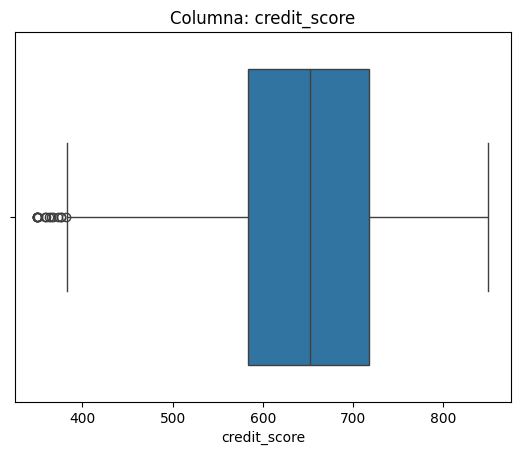


 age


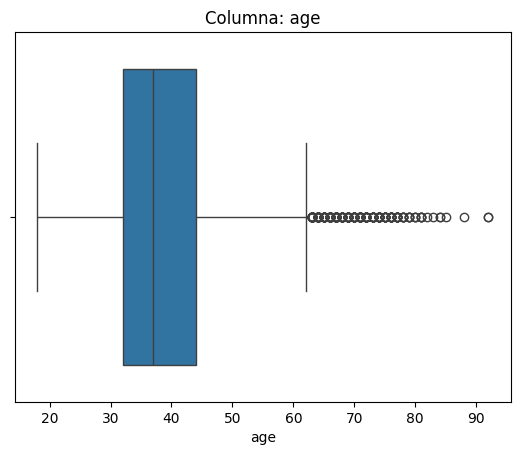


 tenure


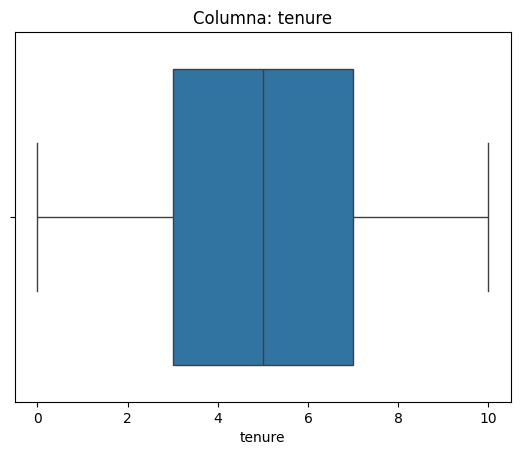


 balance


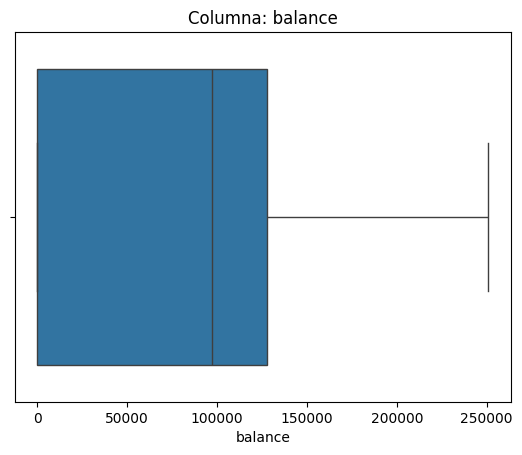


 products_number


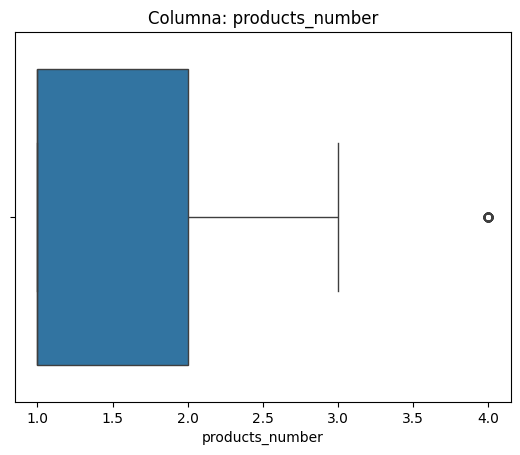


 estimated_salary


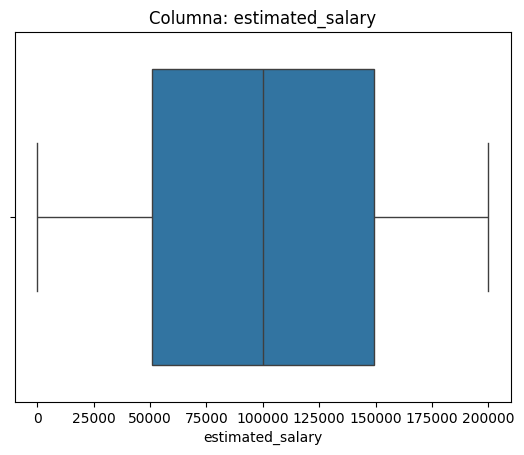

In [154]:
#Chequeo usando diagrama de cajas
for col in considerar.columns.to_list():
  print("\n",col)

  # Gráficos de manera individual
  fig = plt.figure()
  sns.boxplot(considerar, x = col)
  plt.title(f"Columna: {col}")
  plt.show()

Se observa que las variables *credit_score*, *age* y *products_number* contienen valores atípicos que se deberían analizar.

### **Rango Intercuartílico (IQR)**

El Rango Intercuartílico (o IQR por sus siglas en inglés) se calcula como la diferencia entre el tercer cuartil (75% de los datos) y el primer cuartil (25% de los datos).

Este valor sirve después para establecer los límites inferiores y superiores de cada variable que serán usados para la limpieza del dataset.

In [155]:
# Creando una función para el rango intercuartílico
def outliers_iqr(df, columna):
  """
  Calcula el rango intercuartílico (IQR) y identifica outliers para una columna.

  Argumentos:
    df: DataFrame de pandas.
    columna: Nombre de la columna a analizar (string).

  Resultado:
    Un DataFrame con los outliers identificados.
  """
  q1 = df[columna].quantile(0.25)
  print(f"Primer Cuartil ({columna}): ", q1)
  q3 = df[columna].quantile(0.75)
  print(f"Tercer Cuartil ({columna}): ", q3)
  iqr = q3 - q1
  print(f"Rango intercuartílico ({columna}): ", iqr)

  lim_inf = q1 - (1.5 * iqr)
  lim_sup = q3 + (1.5 * iqr)
  print(f"Límite inferior ({columna}): ", lim_inf)
  print(f"Límite superior ({columna}): ", lim_sup)

  outliers = df[(df[columna] < lim_inf) | (df[columna] > lim_sup)]

  print(f'Número de outliers en {columna}: {len(outliers)}', "\n")
  return outliers

Revisión de la variable *credit_score*

In [156]:
outliers_iqr(considerar,"credit_score")

Primer Cuartil (credit_score):  584.0
Tercer Cuartil (credit_score):  718.0
Rango intercuartílico (credit_score):  134.0
Límite inferior (credit_score):  383.0
Límite superior (credit_score):  919.0
Número de outliers en credit_score: 15 



,credit_score,age,tenure,balance,products_number,estimated_salary
customer_id,,,,,,
15656148,376,29,4,115046.74,4,119346.88
15804586,376,46,6,0.00,1,157333.69
15779947,363,28,6,146098.43,3,100615.14
15612494,359,44,6,128747.69,1,146955.71
15685372,350,54,1,152677.48,1,191973.49
15758813,350,39,0,109733.20,2,123602.11
15692416,358,52,8,143542.36,3,141959.11
15679249,351,57,4,163146.46,1,169621.69
15597896,365,30,0,127760.07,1,81537.85


Después de revisada la variable *credit_score* se puede observar que todos los outliers están por debajo del límite inferior y a su vez todos representan clientes que se fueron a la competencia.

Eliminar estos outliers podría incluir sesgos para el modelo de ML al no considerar los score más bajos. Se decide conservarlos porque además, son pocos valores.

Revisión de la variable *age*

In [157]:
outliers_iqr(considerar,"age")

Primer Cuartil (age):  32.0
Tercer Cuartil (age):  44.0
Rango intercuartílico (age):  12.0
Límite inferior (age):  14.0
Límite superior (age):  62.0
Número de outliers en age: 359 



,credit_score,age,tenure,balance,products_number,estimated_salary
customer_id,,,,,,
15623944,511,66,4,0.00,1,1643.11
15805254,652,75,10,0.00,2,114675.75
15804919,670,65,1,0.00,1,177655.68
15589975,646,73,6,97259.25,1,104719.66
15789669,510,65,2,0.00,2,48071.61
...,...,...,...,...,...,...
15705174,656,68,7,153545.11,1,186574.68
15777067,445,64,2,136770.67,1,43678.06
15814690,595,64,2,105736.32,1,89935.73


Los outliers que se identifican en la edad no son valores atípicos puesto que la edad, aunque sea una variable cuantitativa describe mejor una cualidad de un individuo.

Eliminar estos valores podría incluir un sesgo al modelo al no considerar los clientes de edades más altas. Se decide conservar los outliers.

Revisión de la variable *products_number*

In [158]:
outliers_iqr(considerar,"products_number")

Primer Cuartil (products_number):  1.0
Tercer Cuartil (products_number):  2.0
Rango intercuartílico (products_number):  1.0
Límite inferior (products_number):  -0.5
Límite superior (products_number):  3.5
Número de outliers en products_number: 60 



,credit_score,age,tenure,balance,products_number,estimated_salary
customer_id,,,,,,
15656148,376,29,4,115046.74,4,119346.88
15703793,738,58,2,133745.44,4,28373.86
15610383,628,46,1,46870.43,4,31272.14
15670374,819,49,1,120656.86,4,166164.30
15625824,596,30,6,121345.88,4,41921.75
15605279,792,50,9,0.00,4,194700.81
15664754,640,39,9,131607.28,4,6981.43
15603851,704,32,7,127785.17,4,184464.70
15791700,773,47,2,118079.47,4,143007.49


La variable *product_number* toma valores entre 1 y 4. Todos los outliers identificados son aquellos clientes con 4 productos, por lo que no se consdieran valores atípicos.

Se decide conservarlos.

Revisión de la variable *tenure*

In [159]:
outliers_iqr(considerar,"tenure")

Primer Cuartil (tenure):  3.0
Tercer Cuartil (tenure):  7.0
Rango intercuartílico (tenure):  4.0
Límite inferior (tenure):  -3.0
Límite superior (tenure):  13.0
Número de outliers en tenure: 0 



,credit_score,age,tenure,balance,products_number,estimated_salary
customer_id,,,,,,


Como era de esperarse según su diagrama de cajas, la variable tenure no tiene outliers. No hace falta analizar el resto de las variables.

## **3.6. Manejo de datos dependientes**

Esta fase permitirá identificar las dependencias de las variables y analizar el procesamiento/manejo de las mismas. El objetivo de esta fase es la de seleccionar las variables (features selection) o reducir variables de estudio.

En esta sección se incluye:
* la creación de una matriz de correlación que mostrará la dependencia entre las variables,
* la combinación de variables, en caso de ser necesario, para reducir la dimensionalidad.


### **Matriz de correlación**

#### Método Cramer_v

Para la primera parte de este análisis se incluyen los resultados del método Chi Cuadrado (chi2) que se obtuvieron en el punto "3.2. Exploración inicial"

Los valores de correlación expresados van del rango 0 a 1, siendo los más cercanos a 1 los que presenten una relación fuerte. Por contra, los más cercanos a 0 presentan una relación débil.

In [160]:
print(num_cat_corr)

customer_id - country               1.000000
customer_id - gender                1.000000
customer_id - credit_card           1.000000
customer_id - active_member         1.000000
customer_id - churn                 1.000000
credit_score - country              0.220984
credit_score - gender               0.216258
credit_score - credit_card          0.202276
credit_score - active_member        0.211031
credit_score - churn                0.225880
age - country                       0.097273
age - gender                        0.099302
age - credit_card                   0.082292
age - active_member                 0.166181
age - churn                         0.400934
tenure - country                    0.041356
tenure - gender                     0.040643
tenure - credit_card                0.040856
tenure - active_member              0.037457
tenure - churn                      0.037283
balance - country                   0.870788
balance - gender                    0.798570
balance - 

Análisis por variable:

***customer_id***: Todos los valores son 1. Sin embargo, customer_id se pasó como index, por lo que no se considerará más dentro del modelo.

***credit_score***: No se observan valores atípicos. La relación con el resto de variables es similar.

***age***: Se observa una relación moderada con la variable *churn* y una relación debil con el resto de las variables.

***tenure***: No se observan valores atípicos. La relación con el resto de variables es similar.

***balance***: Esta variable presenta una relación fuerte con el resto de las variables. Es necesario revisar su relación con las demás variables numéricas para poder decidir que hacer con ella.

***products_number*** Se observa una relación moderada con la variable *churn*. No así con el resto de las variables.

***estimated_salary***: Presenta un comportamiento similiar a la variable *balance* y esto puede estar relacionado con que son las únicas dos variables numéricas continuas del dataset. Es necesario revisar su relación con las demás variables numéricas para poder decidir que hacer con ella.

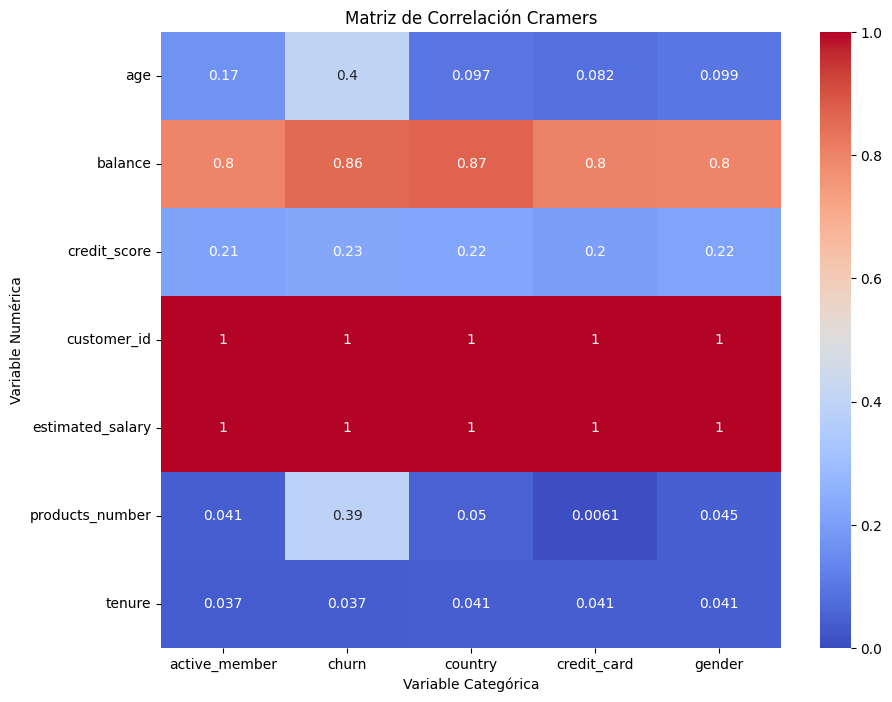

In [161]:
# Pivotar el DataFrame para el heatmap
heatmap_data = num_cat_corr.reset_index().rename(columns={"index": "Variable", 0: "Correlación"})

heatmap_data[["Variable Numérica", "Variable Categórica"]] = heatmap_data["Variable"].str.split(" - ", expand=True)

heatmap_data = heatmap_data.pivot(index="Variable Numérica", columns="Variable Categórica", values="Correlación")

# Crear el heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Matriz de Correlación Cramers")
plt.show()

#### Método Pearson

Para este método se considerarán solo las variables numéricas continuas que podrían tener una distribución más cercana a la normal. También se incluye la variable objetivo para considerar su impacto.

                   balance  estimated_salary     churn
balance           1.000000          0.012797  0.118533
estimated_salary  0.012797          1.000000  0.012097
churn             0.118533          0.012097  1.000000


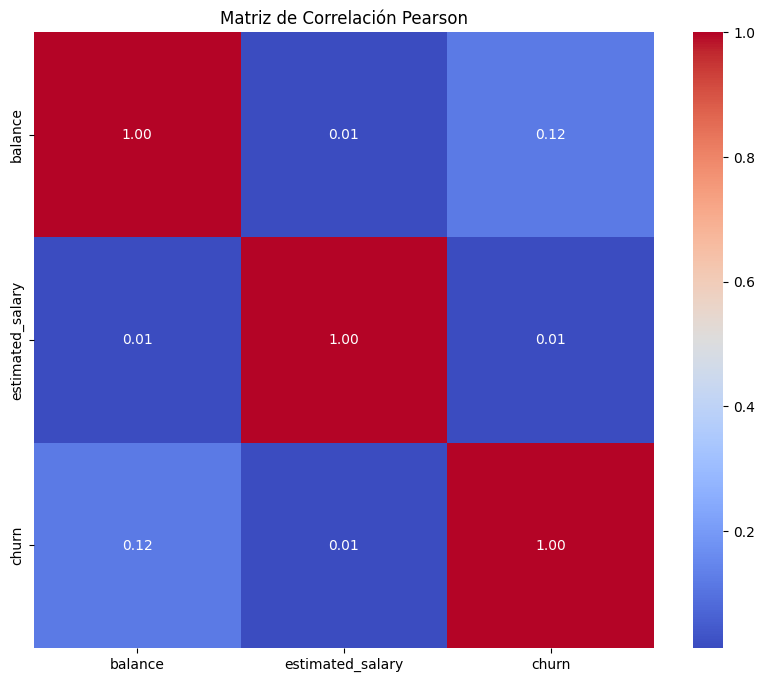

In [162]:
# Creando la matriz de correlación
correlation_matrix_0 = rotacion[["balance","estimated_salary","churn"]].corr(method="pearson")
print(correlation_matrix_0)

# Representando gráficamente mediante un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_0, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación Pearson")
plt.show()

No existe dependencia entre las variables *balance* y *estimated_salary* por lo que está bien conservarlas como parte del modelo.

#### Método Spearman

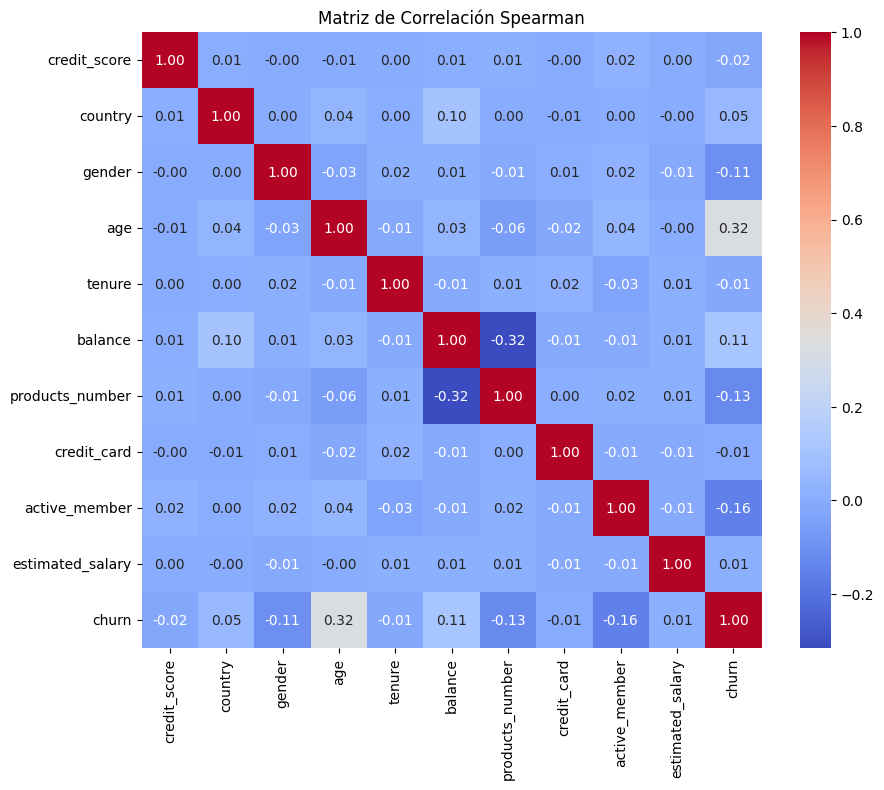

In [163]:
# Creando la matriz de correlación con el método de Spearman
correlation_matrix = rotacion.corr(method="spearman")

#Representando gráficamente mediante un Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación Spearman")
plt.show()

Del Heatmap anterior, resalta a la vista que las variables *balance* y *products_number* tienen una relación inversa con más fuerza que el resto de variables. Lo que queire decir que a menor balance, mayor número de productos.

Tambien resalta que las variables *age* y *churn* tienen una relación directa más fuerte que con el resto de las variables. Podría idnicar que hay mayor probabilidad de churn cuando se tiene más edad.

## **3.7. Análisis estadístico y visualización**

### **Análisis de las variables**

Parte de este análisis fue realizado en puntos anteriores, por lo que no ahondaremos en esta sección. Análisis más avanzados se realizarán más adelante.

In [164]:
rotacion.describe(include="all")

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7055,5151,NaN,7963
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,NaN,NaN,100090.239881,NaN
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,NaN,NaN,57510.492818,NaN
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,NaN,NaN,11.580000,NaN
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,NaN,NaN,51002.110000,NaN
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,NaN,NaN,100193.915000,NaN
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,NaN,NaN,149388.247500,NaN


### **Generación de tablas para visualizaciones**

In [165]:
# Creando una nueva columna de clientes que servira para cálculos de nuevas variables
rotacion["clients"] = 1

In [166]:
# Función para crear una tabla agrupada
def tabla_agrupada(df, columna_agrupar, mapeo_inverso=None):
  """
  Crea una tabla agrupada a partir de un DataFrame, calculando métricas
  agregadas y aplicando un mapeo inverso a la columna de agrupación si se proporciona.

  Argumentos:
    df: DataFrame de pandas.
    columna_agrupar: Nombre de la columna por la que se agrupará (string).
    mapeo_inverso: Diccionario con el mapeo inverso si la columna_agrupar
                    fue codificada con LabelEncoder (opcional).

  Resultado:
    Un DataFrame con la tabla agrupada y métricas calculadas.
  """
  # Definir las agregaciones comunes
  agregaciones = {
      "credit_score":"mean",
      "age":"mean",
      "tenure":"mean",
      "balance":"mean",
      "products_number":"mean",
      "estimated_salary":"mean",
      "churn":"sum",
      "clients":"sum"
  }

  # Eliminar la columna de agrupación de las agregaciones si está presente
  if columna_agrupar in agregaciones:
      del agregaciones[columna_agrupar]

  # Agrupar por la columna especificada y calcular agregaciones
  tabla_agrupada = df.groupby(by=columna_agrupar).agg(agregaciones).reset_index()

  # Calcular churn_rate y clients_rate
  tabla_agrupada["churn_rate"] = tabla_agrupada["churn"] / tabla_agrupada["clients"]
  tabla_agrupada["clients_rate"] = tabla_agrupada["clients"] / df.clients.count()

  # Aplicar mapeo inverso si se proporciona
  if mapeo_inverso:
    reverse_mapping = {v: k for k, v in mapeo_inverso.items()}
    tabla_agrupada[columna_agrupar] = tabla_agrupada[columna_agrupar].map(reverse_mapping)

  return tabla_agrupada

#### Tabla por países

In [167]:
# Validando el mapeo de países que se hizo con LabelEncoder
country_mapping

{'France': np.int64(0), 'Germany': np.int64(1), 'Spain': np.int64(2)}

In [168]:
bycountry = tabla_agrupada(rotacion, "country", country_mapping)
bycountry

,country,credit_score,age,tenure,balance,products_number,estimated_salary,churn,clients,churn_rate,clients_rate
0,France,649.668329,38.511767,5.004587,62092.636516,1.530913,99899.180814,810,5014,0.161548,0.5014
1,Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,101113.435102,814,2509,0.324432,0.2509
2,Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,99440.572281,413,2477,0.166734,0.2477


De la tabla por países se observan los siguientes puntos:
* El país con la tasa más alta de clientes es Francia, y a su vez es el mismo país con la tasa de rotación más baja;
* Alemania tiene la tasa de rotación más alta (casi el doble de sus compañeros) y la segunda tasa de clientes más alta;
* Alemania tiene el salario estimado y el promedio de balance más alto de los tres países. Podemos decir que Alemania tiene clientes bancarios más exigentes;
* El promedio de productos, la permanencia, edad y score tienen promedios similares en los tres países.


#### Tabla por género

In [169]:
# Validando el mapeo de género que se hizo con LabelEncoder
gender_mapping

{'Female': np.int64(0), 'Male': np.int64(1)}

In [170]:
bygender = tabla_agrupada(rotacion, "gender", gender_mapping)
bygender

,gender,credit_score,age,tenure,balance,products_number,estimated_salary,churn,clients,churn_rate,clients_rate
0,Female,650.831389,39.238389,4.966102,75659.369139,1.544134,100601.541382,1139,4543,0.250715,0.4543
1,Male,650.276892,38.658237,5.051677,77173.974506,1.518600,99664.576931,898,5457,0.164559,0.5457


De la tabla por género se observan los siguientes puntos:
* La tasa de clientes oscila levemente hacia los hombres con un 55%, y las mujeres un 45%;
* La tasa de rotación es más alta entre las mujeres, población que tiene el salario estimado más alto. Podrían considerarse más exigentes;
* El balance es ligeramente más alto en los hombres, pero esto podría deberse a una cuestión de cantidad y no de calidad, es decir hay más clientes hombres;
* El score, la edad, la antiguedad y la cantidad de productos en media son similares tanto pra hombres como para mujeres.

#### Tabla por antigüedad

In [171]:
bytenure = tabla_agrupada(rotacion, "tenure")
bytenure

,tenure,credit_score,age,balance,products_number,estimated_salary,churn,clients,churn_rate,clients_rate
0,0,652.043584,39.186441,79878.910630,1.443099,102374.579128,95,413,0.230024,0.0413
1,1,648.806763,39.428986,78555.384222,1.489855,100468.618957,232,1035,0.224155,0.1035
2,2,652.832061,39.058206,76839.626469,1.589695,98312.359857,201,1048,0.191794,0.1048
3,3,650.530228,39.028741,77668.059881,1.533201,97667.196283,213,1009,0.211100,0.1009
4,4,651.502528,38.239636,74059.394065,1.516684,99867.777826,203,989,0.205258,0.0989
5,5,650.527668,39.287549,76444.280860,1.554348,101286.009644,209,1012,0.206522,0.1012
6,6,647.380558,38.862461,74403.942637,1.519131,99168.733154,196,967,0.202689,0.0967
7,7,649.606031,38.367704,75551.634426,1.530156,101257.240370,177,1028,0.172179,0.1028
8,8,647.749268,38.450732,77936.598254,1.522927,101072.102937,197,1025,0.192195,0.1025
9,9,653.638211,39.345528,76562.544014,1.535569,99416.707022,213,984,0.216463,0.0984


De la tabla por antigüedad se observan los siguientes puntos:
* Los valores extremos (0 y 10) comparten un ratio de clientes similar al torno de los 4 - 5%, mientras que los valores internos rondan el 10%.
* La tasa de rotación es más alta en los primeros años con el banco, lo que podría representar pocos incentivos de atracción para los clientes.
* El promedio de las variables credit score, edad, balance, número de productos y salario estimado tienen cada uno promedios similares entre todos los grupos de antigüedad.

#### Tablas por número de productos

In [172]:
bypnumber = tabla_agrupada(rotacion, "products_number")
bypnumber

,products_number,credit_score,age,tenure,balance,estimated_salary,churn,clients,churn_rate,clients_rate
0,1,649.120968,39.673092,4.974626,98551.870614,99487.256851,1409,5084,0.277144,0.5084
1,2,652.188671,37.753595,5.051852,51879.145813,100452.012821,348,4590,0.075817,0.4590
2,3,648.105263,43.195489,5.003759,75458.328195,104318.130564,220,266,0.827068,0.0266
3,4,653.583333,45.683333,5.300000,93733.135000,104763.723333,60,60,1.000000,0.0060


De la taba por cantidad de productos podemos observar que:

* Los clientes que tienen más productos con el banco son los que tienen las tasas más altas de rotación; puede indicar que son clientes más exigentes o que son clientes más atractivos para otros bancos que intentan captar nuevos clientes.
* Aunque los clientes con mayor número de productos tienen las tasas de rotación más altas, se evidencia que no representan un alto número de la población del banco. Los clientes con 1 y 2 productos juntos suman más del 95% (50.84% y 45.9%, respectivamente).


### **Visualizaciones**

In [173]:
# Función para las visualizaciones
def plot_grouped_analysis(df, column_to_group):
  """
  Genera un par de gráficos (barras y línea) para visualizar el balance promedio,
  la cantidad de clientes y la tasa de rotación agrupados por una columna específica.

  Argumentos:
    df: DataFrame de pandas con los datos agrupados.
    column_to_group: Nombre de la columna por la que se ha agrupado (string).
  """
  fig, ax1 = plt.subplots(2, 1, figsize=(8, 12))

  # Gráfico 1: Balance Promedio vs Tasa de Rotación
  ax1[0].bar(df[column_to_group], df['balance'])
  ax1[0].axhline(y=df['balance'].mean(), color='blue')
  ax1[0].set_ylabel('Balance Promedio')
  ax1[0].set_xlabel(column_to_group)
  ax1[0].set_title(f"1. Balance Promedio y Tasa de Rotación por {column_to_group}")

  ax2 = ax1[0].twinx()
  ax2.plot(df[column_to_group], df['churn_rate'], color='red', marker='o', linestyle='--')
  ax2.set_ylabel('Tasa de Rotación')

  # Gráfico 2: Cantidad de Clientes vs Tasa de Rotación
  ax1[1].bar(df[column_to_group], df['clients'])
  ax1[1].axhline(y=df['clients'].mean(), color='blue')
  ax1[1].set_ylabel('Cantidad de Clientes')
  ax1[1].set_xlabel(column_to_group)
  ax1[1].set_title(f"2. Cantidad de Clientes y Tasa de Rotación por {column_to_group}")

  ax3 = ax1[1].twinx()
  ax3.plot(df[column_to_group], df['churn_rate'], color='red', marker='o', linestyle='--')
  ax3.set_ylabel('Tasa de Rotación')

  plt.tight_layout()
  plt.show()

#### Visualizaciones por país

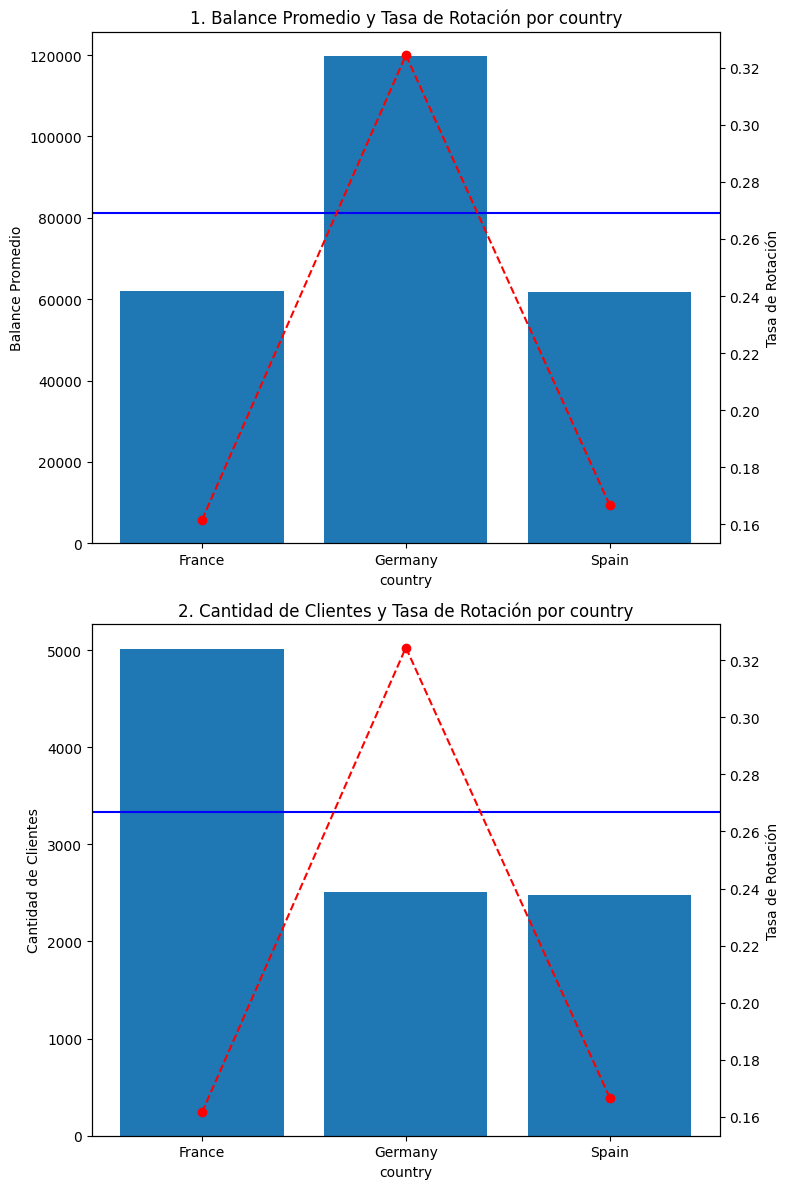

In [174]:
plot_grouped_analysis(bycountry, "country")

Para los dos gráficos, la línea punteada roja representa la tasa de rotación de clientes mientras la línea sólida azul representa el promedio.

**Gráfico 1. Balance Promedio y Tasa de Rotación por país**:
* Este gráfico nos indica que los clientes de Alemania (*Germany*) tienen el balance promedio más alto, mientras que Francia (*France*) y España (*Spain*) tienen balances promedios similares.
* También podemos observar que el balance promedio del dataset (línea horizontal azul) se ve altamente influenciado por los clientes de Alemania.
* Podemos notar que hay una relación directa fuerte entre el balance promedio y la tasa de rotación, es decir, a mayor balance promedio, mayor índice de rotación.

**Gráfico 2. Cantidad de clientes y Tasa de Rotación por país:**
* Este gráfico nos muestra que Francia es el país con la mayor cantidad de clientes, mientras que Alemania y España tienen magnitudes similares.
* Como se puede observar, la cantidad de clientes promedio está altamente influenciado por Francia.
* No se observa una relación entre la cantidad de clientes y la tasa de rotación.

#### Visualizaciones por género

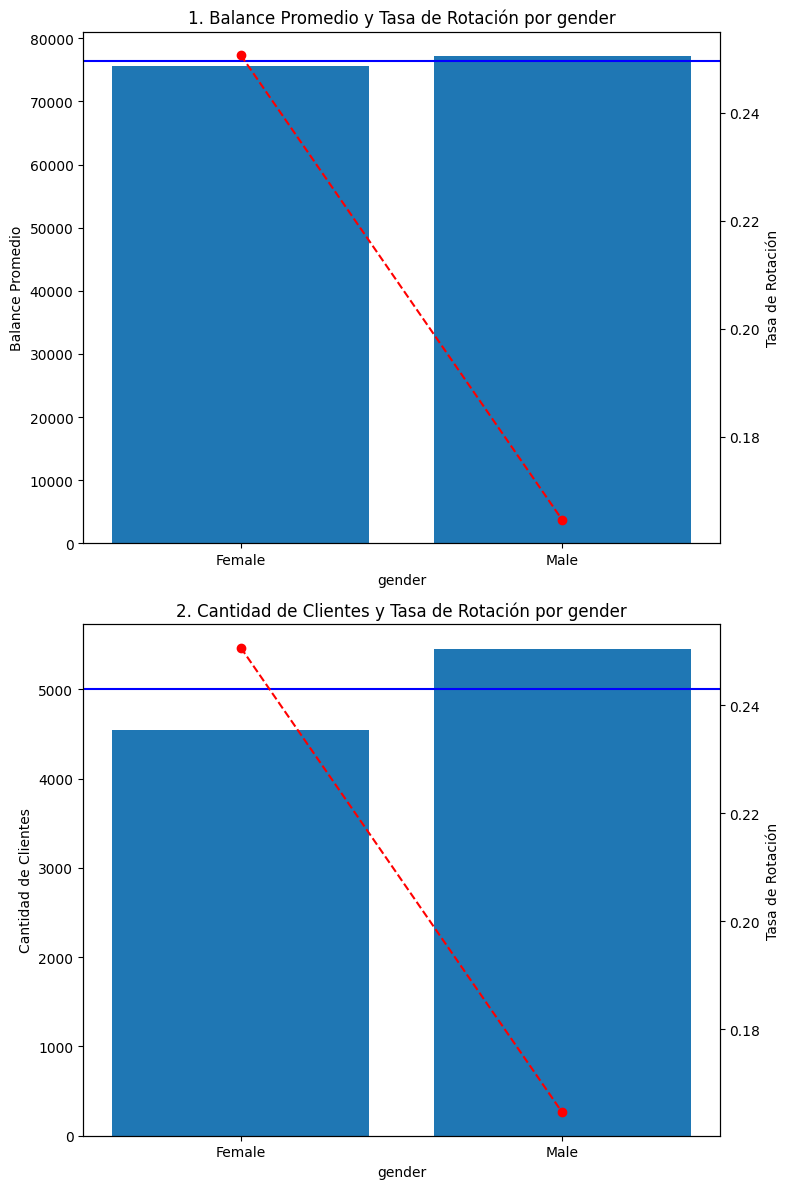

In [175]:
plot_grouped_analysis(bygender, "gender")

Para los dos gráficos, la línea punteada roja representa la tasa de rotación de clientes mientras la línea sólida azul representa el promedio.

**Gráfico 1. Balance Promedio y Tasa de Rotación por género**
* La tasa de rotación no sigue la tendencia del balance de cuenta. Los dos géneros representados en la gráfica tienen un balance similar, pero la tasa de rotación es más alta en las mujeres.
* El balance promedio (línea azul sólida) se ve ligeramente afectado por el balance de los hombres. Dado que son sólo dos categorías en este análisis, este comportamiento del promedio es esperable.

**Gráfico 2. Cantidad de clientes y tasa de rotación por género**
* Esta gráfica muestra también una mayor participación del género másculino en la cantidad de clientes.

No hay comportamientos diferetes respecto del gráfico 1.

#### Visualizaciones por antigüedad

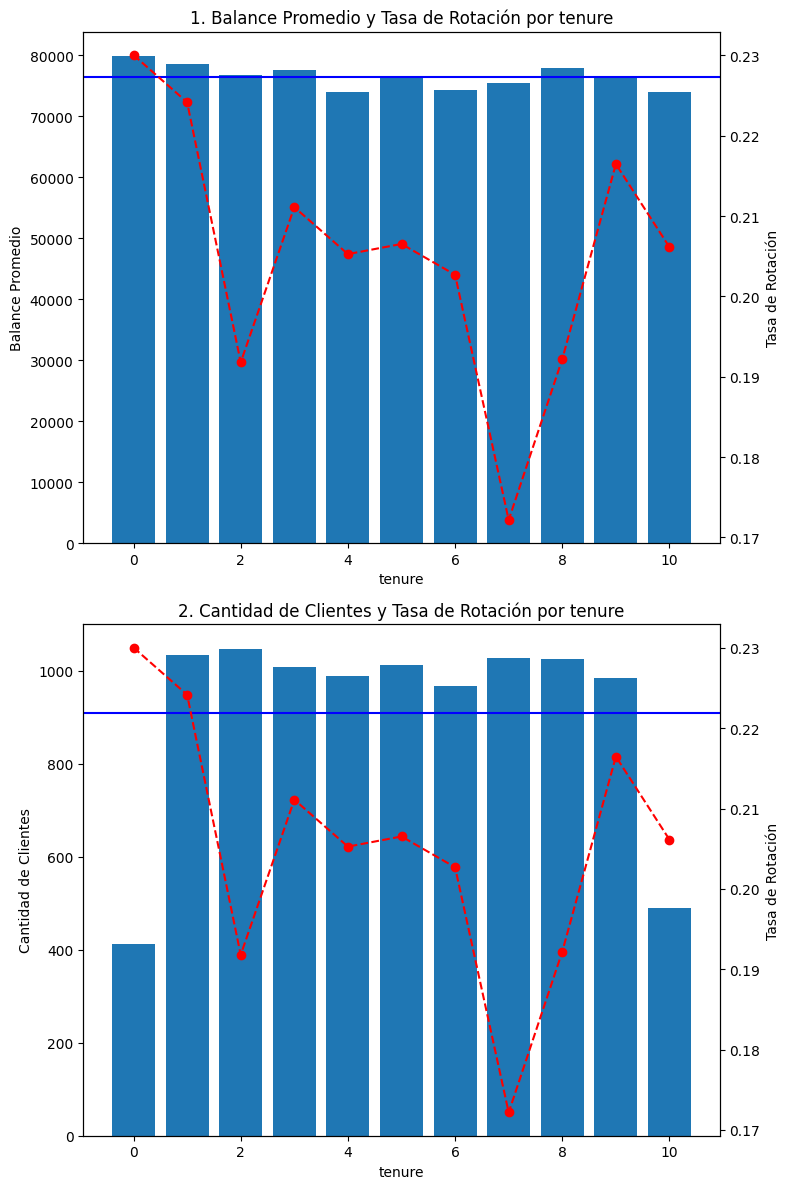

In [176]:
plot_grouped_analysis(bytenure, "tenure")

Para los dos gráficos, la línea punteada roja representa la tasa de rotación de clientes mientras la línea sólida azul representa el promedio.

**Gráfico 1. Balance Promedio y Tasa de rotación por Antiguedad**
* El balance promedio es superado más veces en aquellas antigüedades donde la tasa de rotación es más alta.

**Gráfico 2. Cantidad de clientes y Tasa de Rotación por antigüedad**
* No se observa una tendencia entre las variables estudiadas en este gráfico.
* El promedio de clientes por antigüedad se ve afectado por los extremos 0 y 10, al contener menores valores y que las otras categorías.

#### Visualizaciones por número de productos


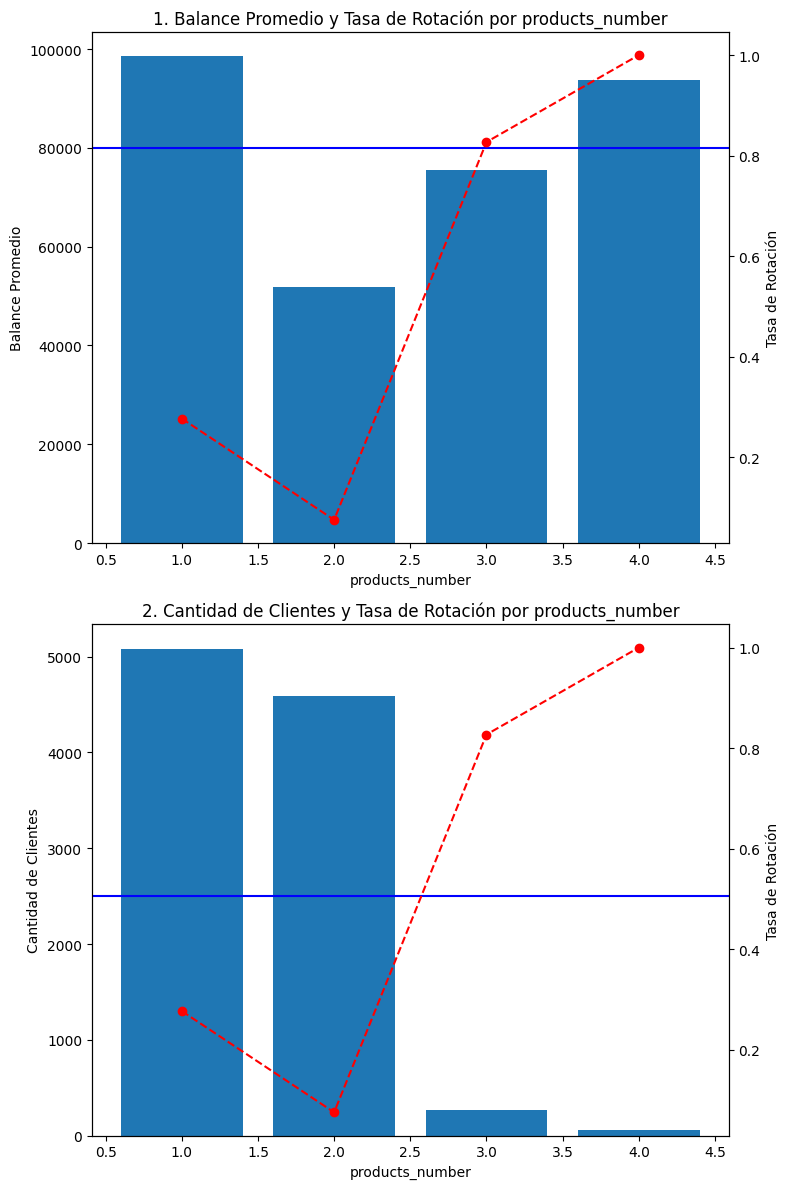

In [177]:
plot_grouped_analysis(bypnumber, "products_number")

Para los dos gráficos, la línea punteada roja representa la tasa de rotación de clientes mientras la línea sólida azul representa el promedio.

**Gráfico 1. Balance promedio y tasa de rotación por número de productos**
* El balance de clientes con 1 y 4 productos supera el promedio de la muestra.
* Los clientes con 3 y 4 productos son los que tienen las tasas de rotación más altas, lo que podría significar que son más exigentes y debe mejorarse la calidad de los servicios.
* Los clientes con 2 productos tienen el balance promedio más bajo y también la tasa de rotación más baja.

**Gráfico 2. Cantidad de clientes y tasa de rotación por número de productos**
* La mayor cantidad de clientes se concentra en aquellos con 1 y 2 productos. Al mismo tiempo estos clientes son los que tienen menores tasas de rotación.
* Los clientes con la mayor cantidad de productos resultan ser la menor proporción del grupo. Sin embargo notamos del gráfico 1 que los clientes con 4 productos tienen balances de cuentas altos.

# **4. Prueba de modelos de Machine Learning (ML) supervisados**

En esta fase del proyecto probaremos diferentes modelos de ML supervisados para Clasificación.

Realizaremos una preparación previa del dataset que consiste en:

* Dividir las variables independientes de la variable dependiente en dos conjuntos X, y - respectivamente.
* Crear conjuntos de entrenamiento (train) y de prueba (test) con una proporción 70/30.

Posteriormente se probarán diferentes modelos de ML.

## **4.1. Variables independientes vs. Variable dependiente**

La variable dependiente de nuestro modelo es *churn*, por consiguiente se separará del resto de variables para el modelo de ML.

In [178]:
# Elimino la variable dependiente y las variables cuantitativas continuas que presentaban alto índice de correlación con la variable objetivo.
X = rotacion.drop(columns=["churn","balance","estimated_salary","clients"])

# Variable dependiente
y = rotacion["churn"]

In [179]:
X.head()

,credit_score,country,gender,age,tenure,products_number,credit_card,active_member
customer_id,,,,,,,,
15634602,619,0,0,42,2,1,True,True
15647311,608,2,0,41,1,1,False,True
15619304,502,0,0,42,8,3,True,False
15701354,699,0,0,39,1,2,False,False
15737888,850,2,0,43,2,1,True,True


In [180]:
y.unique()

array([ True, False])

## **4.2. Conjuntos de entrenamiento y prueba**

In [181]:
# Dividiendo los datos

test_size = 0.2
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,random_state = seed)

In [182]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000,)
(2000,)


## **4.3. Modelos de ML para Clasificación**

### **Decision Tree Classifier**

In [183]:
#Instanciando el modelo
seed = 42

model_dt = DecisionTreeClassifier(random_state = seed)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [184]:
# Generación de predicciones
pred_dt = model_dt.predict(X_train)
print(pred_dt)

[False False  True ...  True  True False]


In [185]:
#Probabilidad de la predicción
pred_prob_dt = model_dt.predict_proba(X_train)
print(pred_prob_dt)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [186]:
# Midiendo el accuracy con el set de entrenamiento
accuracy_score(y_train, pred_dt)

1.0

In [187]:
# Reporte de clasificación
classification_report_dt = classification_report(y_train, pred_dt)
print(classification_report_dt)

# Matriz de confusión
confusion_matrix_dt = confusion_matrix(y_train, pred_dt)
print(confusion_matrix_dt)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6356
        True       1.00      1.00      1.00      1644

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

[[6356    0]
 [   0 1644]]


[Text(0.6917460504271965, 0.9833333333333333, 'age <= 44.5\ngini = 0.327\nsamples = 8000\nvalue = [6356, 1644]'),
 Text(0.5195714408973096, 0.95, 'balance <= 2.5\ngini = 0.228\nsamples = 6130\nvalue = [5324.0, 806.0]'),
 Text(0.6056587456622531, 0.9666666666666666, 'True  '),
 Text(0.3917575200369105, 0.9166666666666666, 'balance <= 1.5\ngini = 0.204\nsamples = 5987\nvalue = [5296, 691]'),
 Text(0.25423738928313194, 0.8833333333333333, 'age <= 38.5\ngini = 0.3\nsamples = 2952\nvalue = [2410, 542]'),
 Text(0.14231026160960022, 0.85, 'country <= 0.5\ngini = 0.236\nsamples = 2127\nvalue = [1837, 290]'),
 Text(0.08413607314456314, 0.8166666666666667, 'age <= 35.5\ngini = 0.174\nsamples = 1110\nvalue = [1003, 107]'),
 Text(0.05544735737276671, 0.7833333333333333, 'gender <= 0.5\ngini = 0.148\nsamples = 831\nvalue = [764, 67]'),
 Text(0.03919624947520642, 0.75, 'credit_score <= 767.5\ngini = 0.192\nsamples = 363\nvalue = [324, 39]'),
 Text(0.02763912860941363, 0.7166666666666667, 'credit_car

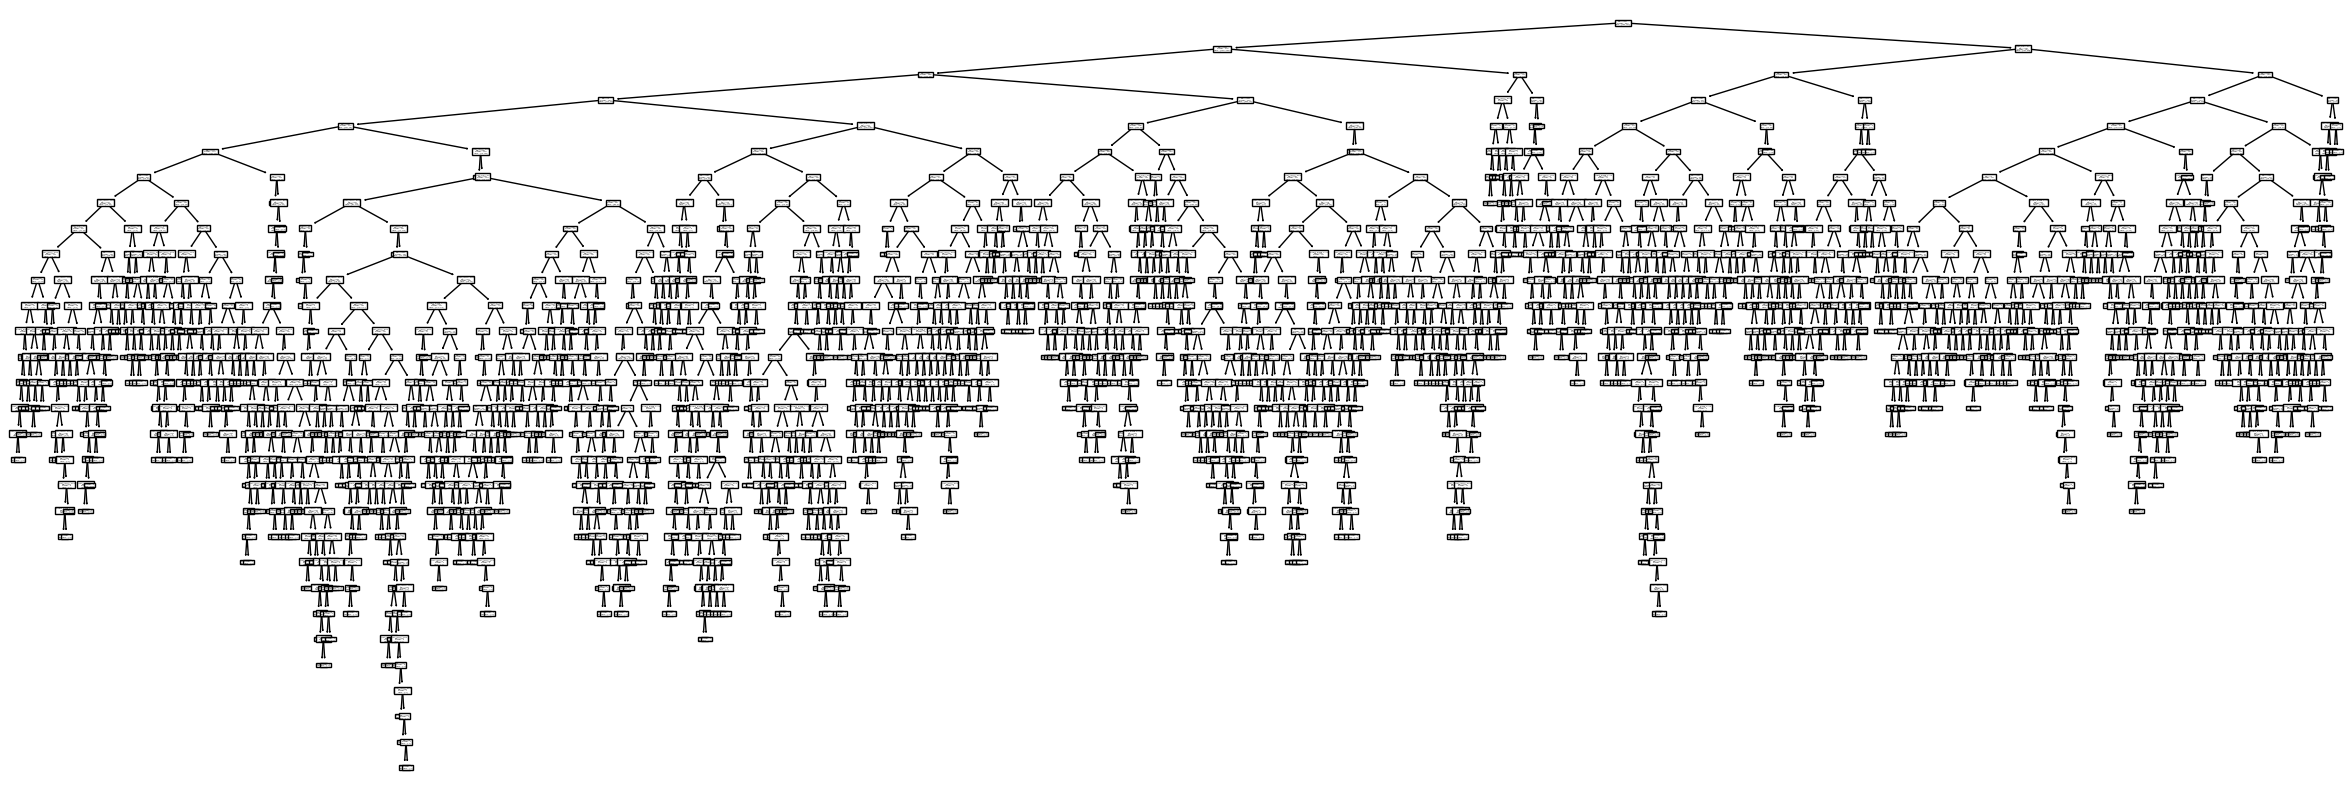

In [188]:
# Graficando el árbol de decisión
fig = plt.figure(figsize=(30,10))
tree.plot_tree(model_dt,
               feature_names=rotacion.columns)

### **K-nearest Neighbors Classifier**

In [189]:
# Instanciando el modelo
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [190]:
# Generación de predicciones
pred_knn = model_knn.predict(X_train)
pred_knn

array([False, False, False, ..., False,  True, False])

In [191]:
# Probabilidad de la predicción
pred_proba_knn = model_knn.predict_proba(X_train)
pred_proba_knn

array([[1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       ...,
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2]])

In [192]:
# Midiendo el accuracy con el set de entrenamiento
accuracy_score(y_train, pred_knn)

0.83925

In [193]:
# Reporte de clasificación
classification_report_knn = classification_report(y_train, pred_knn)
print(classification_report_knn)

# Matriz de confusión
confusion_matrix_knn = confusion_matrix(y_train, pred_knn)
print(confusion_matrix_knn)

              precision    recall  f1-score   support

       False       0.86      0.95      0.90      6356
        True       0.68      0.42      0.52      1644

    accuracy                           0.84      8000
   macro avg       0.77      0.68      0.71      8000
weighted avg       0.82      0.84      0.82      8000

[[6030  326]
 [ 960  684]]


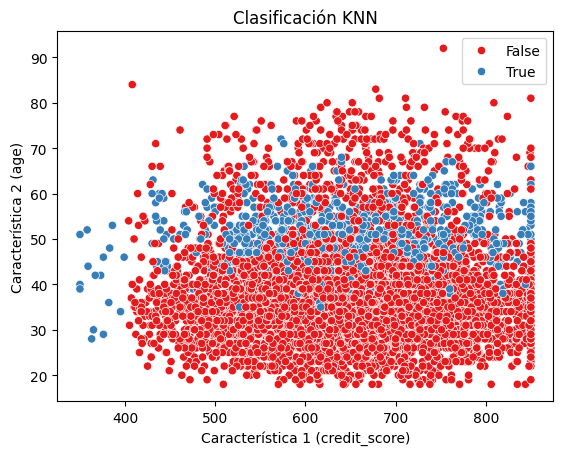

In [194]:
# Visualizar los resultados
sns.scatterplot(x=X_train['credit_score'], y=X_train['age'], hue=pred_knn, palette='Set1')
plt.title("Clasificación KNN")
plt.xlabel("Característica 1 (credit_score)")
plt.ylabel("Característica 2 (age)")
plt.show()

### **Logistic Regression**

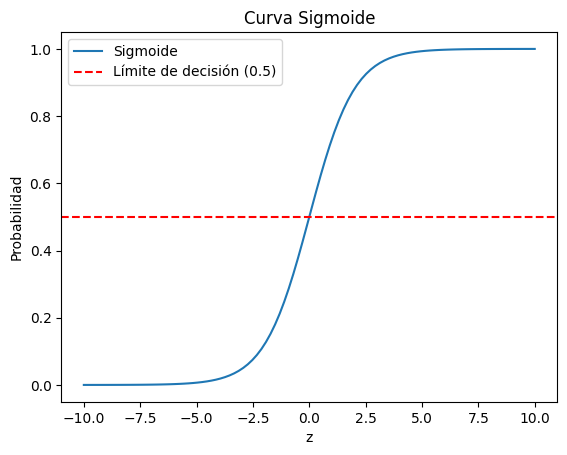

In [195]:
# Definir la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Crear un rango de valores para z
z = np.linspace(-10, 10, 100)

# Calcular la sigmoide para cada valor de z
sigma_z = sigmoid(z)

# Graficar la curva sigmoide
plt.plot(z, sigma_z, label="Sigmoide")
plt.axhline(0.5, color='red', linestyle='--', label="Límite de decisión (0.5)")
plt.title('Curva Sigmoide')
plt.xlabel('z')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

In [196]:
# Instanciando el modelo
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [197]:
# Generando predicciones
pred_lr = model_lr.predict(X_train)
pred_lr

array([False, False, False, ..., False, False, False])

In [198]:
# Midiendo el accuracy con el set de entrenamiento
accuracy_score(y_train,pred_lr)

0.809375

In [199]:
# Reporte de clasificación
classification_report_lr = classification_report(y_train, pred_lr)
print(classification_report_lr)

# Matriz de confusión
confusion_matrix_lr = confusion_matrix(y_train, pred_lr)
print(confusion_matrix_lr)

              precision    recall  f1-score   support

       False       0.82      0.98      0.89      6356
        True       0.64      0.17      0.26      1644

    accuracy                           0.81      8000
   macro avg       0.73      0.57      0.58      8000
weighted avg       0.78      0.81      0.76      8000

[[6201  155]
 [1370  274]]


### **Random Forest Classifier**

In [200]:
# Instanciando el modelo
seed = 42

model_rfc = RandomForestClassifier(random_state = seed)
model_rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [201]:
# Generando predicciones
pred_rfc = model_rfc.predict(X_train)
pred_rfc

array([False, False,  True, ...,  True,  True, False])

In [202]:
# Midiendo el accuracy con el set de entrenamiento
accuracy_score(y_train, pred_rfc)

1.0

In [203]:
# Reporte de clasificación
classification_report_rfc = classification_report(y_train, pred_rfc)
print(classification_report_rfc)

# Matriz de correlación
correlation_matrix_rfc = confusion_matrix(y_train, pred_rfc)
print(correlation_matrix_rfc)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6356
        True       1.00      1.00      1.00      1644

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

[[6356    0]
 [   0 1644]]


# **5. Análisis de los resultados de los modelo**

Para esta sección se utilizaran las siguientes métricas:

* Matriz de confusión: para representar gráficamente las diferentes métricas del modelo;
* Accuracy/Exactitud: métrica que nos dirá el porcentage de aciertos que tiene el modelo;
* Precisión: para este proyecto la precisión corresponde a la capacitad del modelo para predecir cuando un cliente decide rotar de banco;
* Especificidad: para este proyecto la especificidad corresponde a la capacidad del modelo para predecir cuando un cliente decide no rotar de banco;
* F1-Score: que es una medida de desempeño que resume la precisión y la sensibilidad.

## **5.1. Decision Tree Classifier**

In [204]:
# Enseñándole al modelo valores nuevos (usando el set de prueba)
pred_dt_test = model_dt.predict(X_test)
pred_dt_test

array([False, False,  True, ...,  True, False,  True])

### **Matriz de Confusión**

Matriz de Confusión (DataFrame):
              Predicted False  Predicted True
Actual False             1364             243
Actual True               205             188


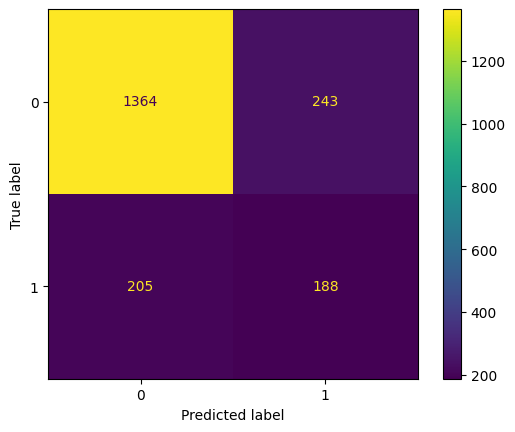

In [205]:
# Crear la matriz de confusión
conf_matrix_dt = confusion_matrix(y_test, pred_dt_test)

# Mostrar la matriz de confusión como DataFrame
conf_matrix_df_dt = pd.DataFrame(conf_matrix_dt,
                              index=[f"Actual {i}" for i in np.unique(y)],
                              columns=[f"Predicted {i}" for i in np.unique(y)])
print("Matriz de Confusión (DataFrame):")
print(conf_matrix_df_dt)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt)
disp.plot()

Con esta matriz podemos observar que el ratio de predecir verdaderos False (es decir predecir verdaderos valores de los que se quedan) es muy alto. Sin embargo, el rato de predecir verdaderos True (es decir, predecir verdaderos valores de los que se van), está al rededor del 44%.

### **Accuracy/Exactitud**

In [206]:
# Midiendo el accuracy con el set de prueba
accuracy_score(y_test, pred_dt_test)

0.776

Se observa que la exactitud pasa del 100% con datos de entrenamiento al 77.6% con los datos de prueba. Lo que evidenica un modelo mal balanceado.

### **Precisión - Positive Predictive Value o PVV**

In [207]:
# Calcular la precisión
precision_dt = precision_score(y_test, pred_dt_test)

print(f"Precisión del modelo: {precision_dt:.2f}")

Precisión del modelo: 0.44


### **Especificidad - Tasa de Verdaderos**

In [208]:
# Calcular la matriz de confusión
# Usamos confusion_matrix para obtener los valores de:
# TN (True Negatives): Negativos reales predichos correctamente.
# FP (False Positives): Negativos reales mal predichos como positivos.
# Usamos .ravel() para descomponer la matriz en valores TN, FP, FN, TP.

tn, fp, fn, tp = confusion_matrix(y_test, pred_dt_test).ravel()

In [209]:
# Calcular especificidad
specificity_dt = tn / (tn + fp)
print(f"Especificidad del modelo: {specificity_dt:.2f}")

Especificidad del modelo: 0.85


### **F1-Score**

In [210]:
# Calcular precisión, recall y F1-Score
precision_dt = tp / (tp + fp)
recall_dt = tp / (tp + fn)
f1_score_dt = 2 * (precision_dt * recall_dt) / (precision_dt + recall_dt)

print(f"Precisión: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1-Score: {f1_score_dt:.2f}")

Precisión: 0.44
Recall: 0.48
F1-Score: 0.46


## **5.2. K-nearest Neighbors Classifier**

In [211]:
# Usando el set de prueba para mostrarle datos nuevos al modelo
pred_knn_test = model_knn.predict(X_test)
pred_knn_test

array([False, False, False, ..., False, False, False])

### **Matriz de Confusión**

Matriz de Confusión (DataFrame):
              Predicted False  Predicted True
Actual False             1486             121
Actual True               293             100


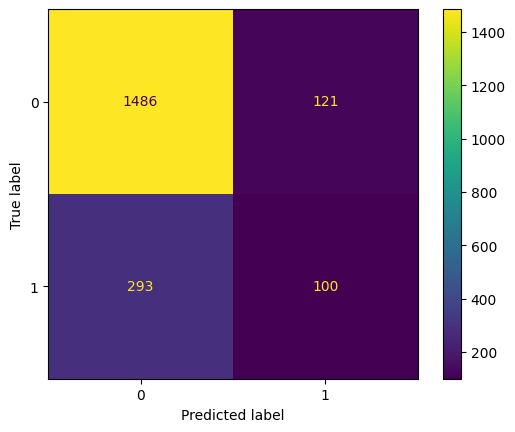

In [212]:
# Crear la matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, pred_knn_test)

# Mostrar la matriz de confusión como DataFrame
conf_matrix_df_knn = pd.DataFrame(conf_matrix_knn,
                              index=[f"Actual {i}" for i in np.unique(y)],
                              columns=[f"Predicted {i}" for i in np.unique(y)])
print("Matriz de Confusión (DataFrame):")
print(conf_matrix_df_knn)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn)
disp.plot()

En este caso, la matriz de confusión muestra que los verdaderos False son más precisos, pero los verdaderos True son menos confiables.

### **Accuracy/Exactitud**

In [213]:
# Midiendo el accuracy con el seet de entrenamiento
accuracy_score(y_test, pred_knn_test)

0.793

Con KNN como modelo observamos que exactitud baja del 83.92% con los datos de entrenamiento a 79.3% - una caída de 4.62%.

### **Precisión - Positive Predictive Value o PVV**

In [214]:
# Calcular la precisión
precision_knn = precision_score(y_test, pred_knn_test)

print(f"Precisión del modelo: {precision_knn:.2f}")

Precisión del modelo: 0.45


### **Especificidad - Tasa de Verdaderos**

In [215]:
# Calcular la matriz de confusión
# Usamos confusion_matrix para obtener los valores de:
# TN (True Negatives): Negativos reales predichos correctamente.
# FP (False Positives): Negativos reales mal predichos como positivos.
# Usamos .ravel() para descomponer la matriz en valores TN, FP, FN, TP.

tn, fp, fn, tp = confusion_matrix(y_test, pred_knn_test).ravel()

In [216]:
# Calcular especificidad
specificity_knn = tn / (tn + fp)
print(f"Especificidad del modelo: {specificity_knn:.2f}")

Especificidad del modelo: 0.92


### **F1-Score**

In [217]:
# Calcular precisión, recall y F1-Score
precision_knn = tp / (tp + fp)
recall_knn = tp / (tp + fn)
f1_score_knn = 2 * (precision_dt * recall_dt) / (precision_dt + recall_dt)

print(f"Precisión: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1-Score: {f1_score_knn:.2f}")

Precisión: 0.45
Recall: 0.25
F1-Score: 0.46


## **5.3. Logistic Regression**

In [218]:
# Mostrándole datos nuevos al modelo con el set de prueba
pred_lr_test = model_lr.predict(X_test)
pred_lr_test

array([False, False, False, ..., False, False, False])

### **Matriz de Confusión**

Matriz de Confusión (DataFrame):
              Predicted False  Predicted True
Actual False             1574              33
Actual True               326              67


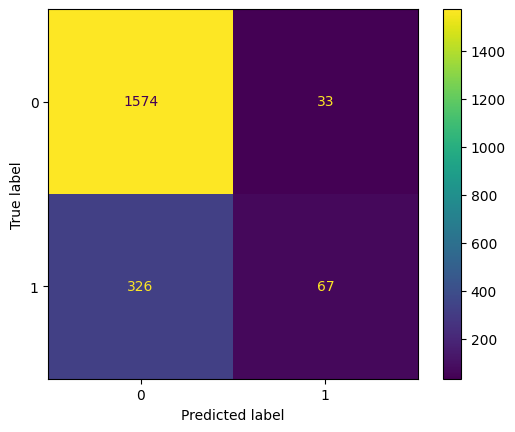

In [219]:
# Crear la matriz de confusión
conf_matrix_lr = confusion_matrix(y_test, pred_lr_test)

# Mostrar la matriz de confusión como DataFrame
conf_matrix_df_lr = pd.DataFrame(conf_matrix_lr,
                              index=[f"Actual {i}" for i in np.unique(y)],
                              columns=[f"Predicted {i}" for i in np.unique(y)])
print("Matriz de Confusión (DataFrame):")
print(conf_matrix_df_lr)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr)
disp.plot()

Se observa que con este modelo la precisión de verdaderos False aumenta aún más, pero se observa una caída significativa en la prcesión de los verdaderos True.

### **Accuracy/Exactitud**

In [220]:
# Midiendo el accuracy con el set de prueba
accuracy_score(y_test,pred_lr_test)

0.8205

En este caso, la exactitud con datos de entrenamiento fue de 81.1% y la exactitud con datos de prueba es de 82.1%, representando un aumento de 1%. Hasta ahora el modelo con mejor performance en cuanto a accuracy.

### **Precisión - Positive Predictive Value o PVV**

In [221]:
# Calcular la precisión
precision = precision_score(y_test, pred_lr_test)

print(f"Precisión del modelo: {precision:.2f}")

Precisión del modelo: 0.67


### **Especificidad - Tasa de Verdaderos**

In [222]:
# Calcular la matriz de confusión
# Usamos confusion_matrix para obtener los valores de:
# TN (True Negatives): Negativos reales predichos correctamente.
# FP (False Positives): Negativos reales mal predichos como positivos.
# Usamos .ravel() para descomponer la matriz en valores TN, FP, FN, TP.

tn, fp, fn, tp = confusion_matrix(y_test, pred_lr_test).ravel()

In [223]:
# Calcular especificidad
specificity = tn / (tn + fp)
print(f"Especificidad del modelo: {specificity:.2f}")

Especificidad del modelo: 0.98


### **F1-Score**

In [224]:
# Calcular precisión, recall y F1-Score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

Precisión: 0.67
Recall: 0.17
F1-Score: 0.27


## **5.4. Random Forest Classifier**

In [225]:
# Enseñándole datos nuevos al modelo con el set de prueba
pred_rfc_test = model_rfc.predict(X_test)
pred_rfc_test

array([False, False, False, ..., False, False,  True])

### **Matriz de Confusión**

Matriz de Confusión (DataFrame):
              Predicted False  Predicted True
Actual False             1521              86
Actual True               215             178


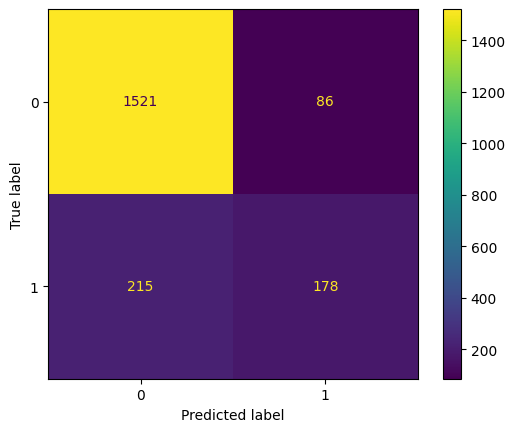

In [226]:
# Crear la matriz de confusión
conf_matrix_rfc = confusion_matrix(y_test, pred_rfc_test)

# Mostrar la matriz de confusión como DataFrame
conf_matrix_df_rfc = pd.DataFrame(conf_matrix_rfc,
                              index=[f"Actual {i}" for i in np.unique(y)],
                              columns=[f"Predicted {i}" for i in np.unique(y)])
print("Matriz de Confusión (DataFrame):")
print(conf_matrix_df_rfc)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfc)
disp.plot()

La precisión de verdaderos False sigue alta mientras que la probabilidad de verdaderos True es baja.

### **Accuracy/Precisión**

In [227]:
# Midiendo el accuracy con el set de prueba
accuracy_score(y_test, pred_rfc_test)

0.8495

Con el modelo de Random Forest la precisión pasa de 100% con datos de entrenamiento a 84.95% con datos de prueba. Esto indica que el modelo necesita ajustes.

### **Precisión - Positive Predictive Value o PVV**

In [228]:
# Calcular la precisión
precision_rfc = precision_score(y_test, pred_rfc_test)

print(f"Precisión del modelo: {precision_rfc:.2f}")

Precisión del modelo: 0.67


### **Especificidad - Tasa de Verdaderos**

In [229]:
# Calcular la matriz de confusión
# Usamos confusion_matrix para obtener los valores de:
# TN (True Negatives): Negativos reales predichos correctamente.
# FP (False Positives): Negativos reales mal predichos como positivos.
# Usamos .ravel() para descomponer la matriz en valores TN, FP, FN, TP.

tn, fp, fn, tp = confusion_matrix(y_test, pred_rfc_test).ravel()

In [230]:
# Calcular especificidad
specificity_rfc = tn / (tn + fp)
print(f"Especificidad del modelo: {specificity_rfc:.2f}")

Especificidad del modelo: 0.95


### **F1-Score**

In [231]:
# Calcular precisión, recall y F1-Score
precision_rfc = tp / (tp + fp)
recall_rfc = tp / (tp + fn)
f1_score_rfc = 2 * (precision_rfc * recall_rfc) / (precision_rfc + recall_rfc)

print(f"Precisión: {precision_rfc:.2f}")
print(f"Recall: {recall_rfc:.2f}")
print(f"F1-Score: {f1_score_rfc:.2f}")

Precisión: 0.67
Recall: 0.45
F1-Score: 0.54


# **6. Optimización de los Modelos**

Del apartado anterior se observó que tanto el modelo de Árboles de Decisión (*Decisión tree*) como el modelo de Bosque Aleatorio (*Random forest*) pasaron una preción del 100% con el conjunto de entrenamiento a 77.6% y 84.95%, respectivamente, con el conjunto de prueba.

## **6.1. Ajustando el modelo de Decision Tree Classifier**

In [232]:
# Manual Tuning - Ajuste manual de hiperparámetros

#Instanciando el modelo ajustado
Adjmodel_dt = DecisionTreeClassifier(
    criterion='gini',       # Criterio de división
    max_depth=8,            # Profundidad máxima
    max_features='sqrt'     # Máximo de características
)
Adjmodel_dt.fit(X_train, y_train)

# Predecir y evaluar el modelo con datos de entrenamiento
Adjpred_dt = Adjmodel_dt.predict(X_train)
accuracy_dt = accuracy_score(y_train, Adjpred_dt)
print(f"Precisión del árbol de decisión (train): {accuracy_dt:.4f}")

# Enseñándole al modelo valores nuevos (usando el set de prueba)
Adjpred_dt_test = Adjmodel_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, pred_dt_test)
print(f"Precisión del árbol de decisión (test): {accuracy_dt_test:.4f}")

Precisión del árbol de decisión (train): 0.8529
Precisión del árbol de decisión (test): 0.7760


La precisión del árbol de decisión con el conjunto de entramiento pasó de 100% a 86.16% - Un porcentage más razonable comparado con la precisión del conjunto de prueba que se mantiene en 77.60% reduciendo la brecha a 856 bps

In [233]:
# Grid Search

# Definir el modelo y la cuadrícula de parámetros
GSmodel_dt = DecisionTreeClassifier()
GSparam_grid_dt = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [3, 5, 8],
    "max_features": ["sqrt", "log2"]
}

# Grid Search con validación cruzada
grid_search_dt = GridSearchCV(GSmodel_dt, GSparam_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros:", grid_search_dt.best_params_)
print("Mejor precisión:", grid_search_dt.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}
Mejor precisión: 0.8473749999999999


Con el método de Grid Search, obtenemos una preción de 84.51% - más baja que con el ajuste manual de hiperparámetros.

## **6.2. Ajustando el modelo de Random Forest Classifier**

In [234]:
# Random Search

# Definir el modelo y los parámetros aleatorios
RSmodel_rf = RandomForestClassifier()
RSparam_grid_rf = {
    "n_estimators": [50, 100, 200],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [3, 5, 8],
    "max_features": ["sqrt", "log2"]
}

# Random Search con validación cruzada
random_search_rf = RandomizedSearchCV(RSmodel_rf, RSparam_grid_rf, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search_rf.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros:", random_search_rf.best_params_)
print("Mejor precisión:", random_search_rf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'gini'}
Mejor precisión: 0.85775


Con el método de Random Search, obtenemos una precisión de 85.76%.

# **7. Conclusiones**

La tasa de rotación de clientes es una medida importante que debe permanecer en el radar de cualquier gerente. Esta tasa proporciona indicios sobre deficiencias en la calidad de los productos o servicios; influye en una potencial pérdida de ingresos o un alto incurrimiento de gastos. Poder predecir (mediante la clasificación) esta medida sería un hallazgo importante para la gerencia.

A lo largo de este trabajo se aplicaron diversas técnicas de análisis, tanto cualitativas como cuantitativas. Se pudo realizar una exploración inicial de los datos de la que pudimos definir la calidad de nuestro Dataset; se implementaron técnicas de limpieza de datos para el tratamiento de duplicados y de datos faltantes; se identificaron y estudiaron las anomalías de los datos, concluyendo que era necesario mantenerlas.

Se aplicaron también diferentes métodos de análisis de la correlación, del que pudimos identificar que las variables numéricas continuas (ej.: *balance* y *estimated_salary*) estaban estrechamente relacionadas con la variable objetivo (*churn*), y por consiguiente era mejor no considerarlas en nuestro modelo.

El análisis estadístico permitió conocer, entre muchas otras cosas, que la tasa de rotación de clientes actual (real) es del 20.37%; que el país con mayor índice de rotación es Alemania (32.44%), al mismo tiempo que es el país con el mayor balance promedio y el mayor salario estimado promedio. También se pudo identificar que la tasa de rotación es más alta en mujeres (25% vs. 16%), aunque sean el grupo de menor participación en el total de clientes (45% vs. 55%).

Finalmente, la parte decisiva de este proyecto estaba en la modelación. Para este ejercicio se ensayaron cuatro modelos: Decision Tree (DTC), K-nearest Neighbors (KNN), Logistic Regression (LR) y Random Forest (RFC). Todos los modelos usaron una distribución del Dataset del 80% para entrenamiento y el 20% restante para pruebas. Los resultados fueron variados, pero acá se detallan los principales hallazgos:
* La exactitud (accuracy) ronda el promedio del 81%, siendo el modelo con mayor porcentaje el de DTC con un 86.16% post ajuste de hiperparámetros.
* La precisión rondó el promedio de los 56%, siendo los modelos con mayor porcentaje el de LR, RFC con un 67%.
* La especificidad promedió los 92.5%, siendo el modelo con mayor porcentaje el de LR, 98%.
* El F1-Score en promedio fue 0.43, siendo el modelo con mayor porcentaje el de RFC con 0.54.

Los resultados hablan por sí solos, el modelo que mejor se ajusta a las necesidades del negocio es el de RFC.
